In [15]:
import numpy as np
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
glove_content = '''
king 0.50 0.70 -0.60 0.10
queen 0.55 0.75 -0.65 0.12
man 0.40 0.50 -0.30 0.05
woman 0.45 0.55 -0.35 0.07
apple 0.90 0.10 0.05 -0.20
mango 0.88 0.12 0.08 -0.18
computer -0.50 -0.40 0.80 0.90
keyboard -0.55 -0.42 0.85 0.92
'''

In [3]:
glove2word2vec('../datasets/test_glove.txt','test_wv.txt')

C:\Users\dai\AppData\Local\Temp\ipykernel_15268\3742037297.py:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('../datasets/test_glove.txt','test_wv.txt')


(8, 4)

In [6]:
model = KeyedVectors.load_word2vec_format('test_wv.txt',binary = False)
model

In [11]:
model.similarity('computer','apple')

np.float32(-0.49739856)

In [12]:
model.most_similar('king')

[('queen', 0.9998945593833923),
 ('woman', 0.9870703816413879),
 ('man', 0.9841422438621521),
 ('apple', 0.48034894466400146),
 ('mango', 0.47785234451293945),
 ('computer', -0.6402799487113953),
 ('keyboard', -0.6546540856361389)]

In [13]:
model.most_similar(positive=['woman','king'],negative = ['man'])

[('queen', 0.9998007416725159),
 ('apple', 0.47416651248931885),
 ('mango', 0.4710738956928253),
 ('computer', -0.633119523525238),
 ('keyboard', -0.6478927731513977)]

In [14]:
model.doesnt_match(['mango','apple','computer'])

'computer'

<h1>Visualize</h1>

In [16]:
pca = PCA(n_components=2)

words_of_interest = [
'king',
'queen', 
'man', 'woman',
'apple', 'mango',
'computer','keyboard']

In [18]:
vectors = model.vectors
len(vectors)
vectors

array([[ 0.5 ,  0.7 , -0.6 ,  0.1 ],
       [ 0.55,  0.75, -0.65,  0.12],
       [ 0.4 ,  0.5 , -0.3 ,  0.05],
       [ 0.45,  0.55, -0.35,  0.07],
       [ 0.9 ,  0.1 ,  0.05, -0.2 ],
       [ 0.88,  0.12,  0.08, -0.18],
       [-0.5 , -0.4 ,  0.8 ,  0.9 ],
       [-0.55, -0.42,  0.85,  0.92]], dtype=float32)

In [19]:
vectors = np.array(vectors)
vectors.shape

(8, 4)

In [21]:
vectors_2d = pca.fit_transform(vectors)
vectors_2d.shape

(8, 2)

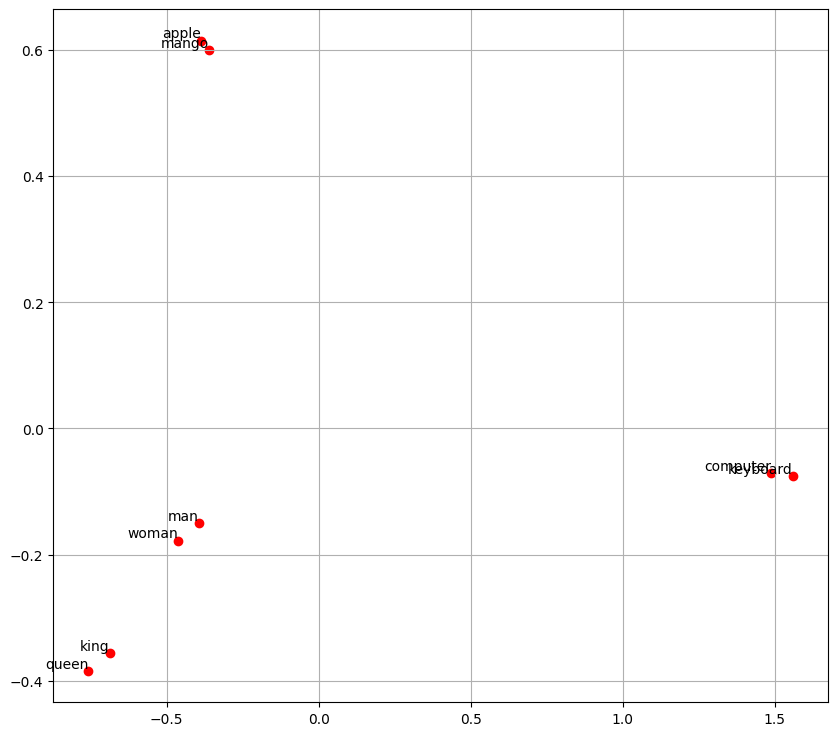

In [23]:
plt.figure(figsize=(10,9))
plt.scatter(vectors_2d[:,0],vectors_2d[:,1],color = 'r')
for i,word in enumerate(model.index_to_key):
    plt.annotate(word,xy = (vectors_2d[i,0],vectors_2d[i,1]),
                ha='right',va = 'bottom')
plt.grid()